In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df = pd.read_csv('./data/Car_Purchasing_Data.csv')

In [7]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
# 연봉이 가장 높은 사람은?

In [10]:
df.loc[df['Annual Salary'] == df['Annual Salary'].max(), ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


In [11]:
# 자산이 가장 많은 사람은?

In [12]:
df.loc[df['Net Worth'] == df['Net Worth'].max(), ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
315,"Cameron, Kimberley P.",nec.tellus@lacinia.co.uk,Namibia,1,55.017566,83333.81054,9874.075327,1000000.0,80000.0


In [13]:
# 나이가 가장 많은 사람은?

In [14]:
df.loc[df['Age'] == df['Age'].max(), ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
194,Gil Sanders,eu.ultrices@cursuset.net,Haiti,0,70.0,52323.2448,12438.85648,346555.1716,56229.4127


In [15]:
# 상관관계 분석을 위해서, pairplot을 그려보자.

C:\Users\406\.conda\envs\str_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\406\.conda\envs\str_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\406\.conda\envs\str_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\406\.conda\envs\str_310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

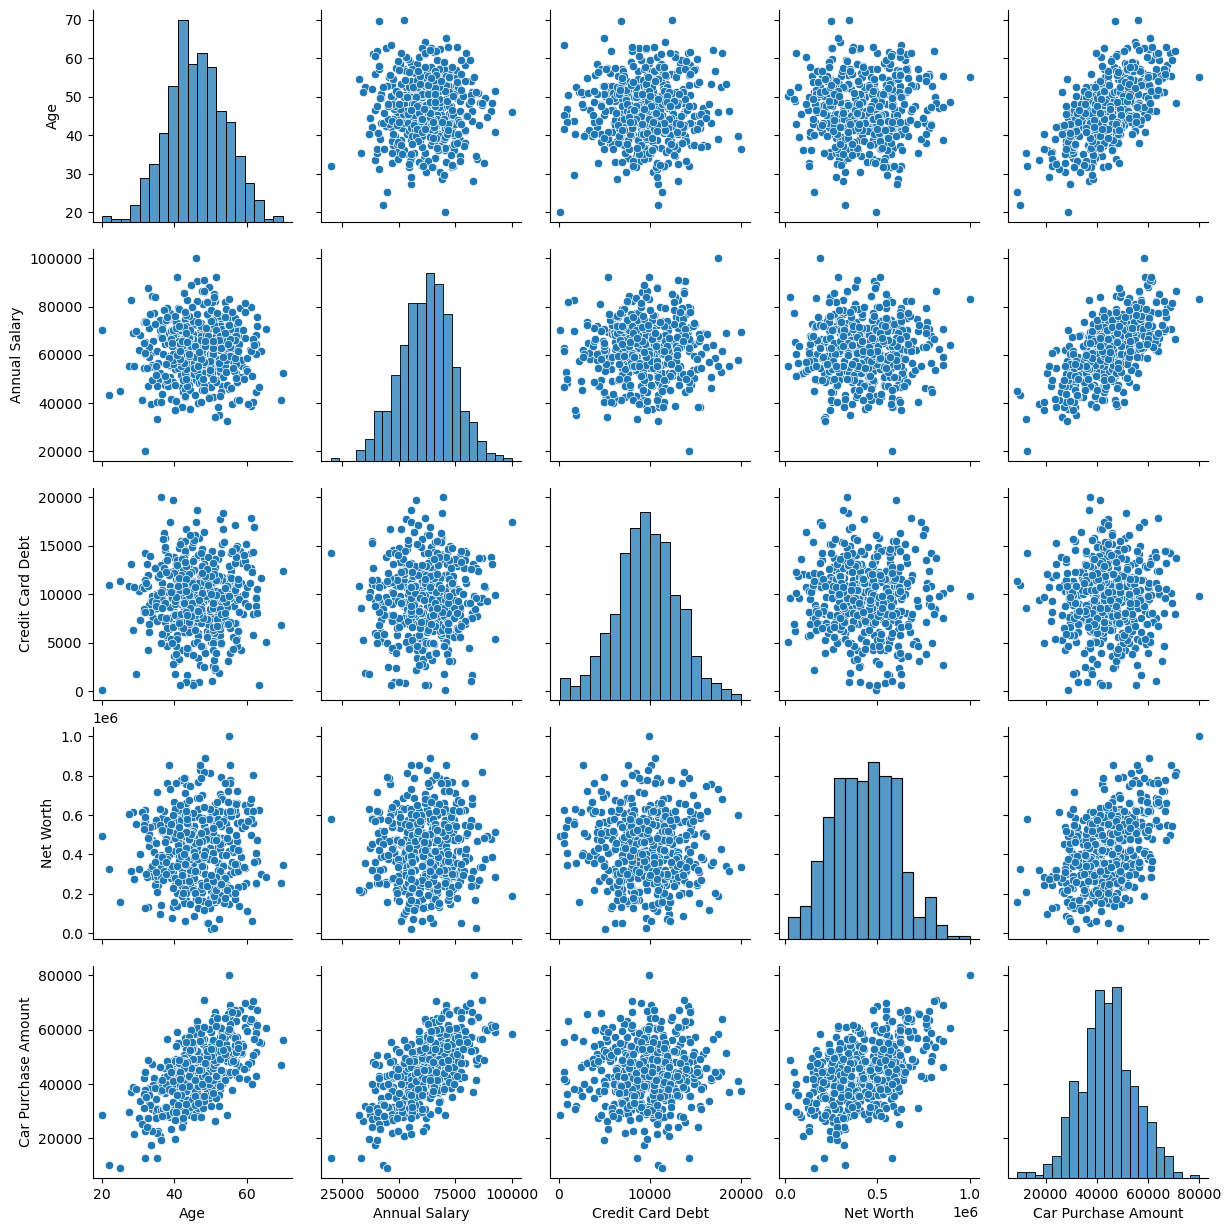

In [18]:
sb.pairplot(data=df, vars=['Age','Annual Salary','Credit Card Debt','Net Worth','Car Purchase Amount']) #특정컬럼의 pairplot vars=[]
plt.show()

In [19]:
df.corr(numeric_only=True)

# streamlit에서 제공하는 heatmap 찾아서 차트로 그린다.

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


In [20]:
# 자동차 구매 금액 예측하는 인공지능 개발

In [22]:
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [23]:
y = df['Car Purchase Amount']

In [24]:
X = df.loc[:, 'Gender':'Net Worth']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=10)

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)

In [30]:
mse = ((y_test - y_pred) **2).mean()

In [31]:
mse

2.3831201764323113

In [ ]:
# 랜덤 포레스트 리그레서

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
regressor2 = RandomForestRegressor()

In [35]:
regressor2.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
y_pred2 = regressor2.predict(X_test)

In [38]:
mse2 = ((y_test - y_pred2) **2).mean()

In [39]:
y_test

151    47604.34591
424    31408.62631
154    42369.64247
190    56579.90338
131    38243.66481
          ...     
295    28440.81268
214    37744.54285
99     42187.68280
245    34139.63730
468    47979.48549
Name: Car Purchase Amount, Length: 125, dtype: float64

In [40]:
y_pred

array([47604.67617217, 31410.43429817, 42371.8514163 , 56584.26641997,
       38242.62772002, 51868.30147632, 37077.0541666 , 48901.147516  ,
       38170.87101414, 32829.40450314, 45272.34888923, 42355.5342573 ,
       42481.35350603, 41674.51270184, 44426.0870966 , 29518.15211272,
       27816.96524072, 37843.74757914, 27588.79834469, 32478.53066607,
       42920.18877733, 34921.33297982, 35138.33519717, 47009.89858868,
       52888.29837461, 44002.4995837 , 52656.28622004, 46401.05291732,
       55593.44097302, 45859.30051547, 45207.65287192, 45014.96239845,
       49991.41445077, 47443.35216534, 57442.29796373, 41264.85300456,
       56562.50862861, 42405.53680876, 35914.13741538, 51732.09164033,
       52473.14010452, 53993.83424572, 30241.75662652, 48025.00234013,
       45077.67394979, 51223.90109118, 70597.28111589, 52952.84639004,
       34518.92143229, 45442.25007785, 34677.25779467, 42321.06576137,
       46401.37330831, 63252.81849379, 44464.22962735, 58839.66970451,
      

In [42]:
# model 폴더 만들기
import os

In [43]:
os.makedirs('model')

In [44]:
#인공지능 저장하기
import joblib

In [45]:
joblib.dump(regressor, './model/regressor.pkl')

['./model/regressor.pkl']